In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "40"
os.environ["NUMBA_NUM_THREADS"] = "40"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../code/")

In [4]:
from labs import true_optimal_mf
from objectives import get_random_guess_merit_factor

In [5]:
# Load directly optimized parameters
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

In [6]:
# Load transferred parameters
df_tran_mf_22 = pd.read_json('../qokit/assets/transferred_from_22_MF.json', orient='index')

In [7]:
df_tran_batch_overlap_0113 = pd.read_json('../qokit/assets/transferred_from_batch_0113.json', orient='index')

In [8]:
df_tran_batch_overlap_0123 = pd.read_json('../qokit/assets/transferred_from_batch_0123.json', orient='index')

In [9]:
df_tran_batch_overlap_0124 = pd.read_json('../qokit/assets/transferred_from_batch_0124.json', orient='index')

In [8]:
# data/0124_transfer_from_batch_* is batch v3

# Parameter transfer

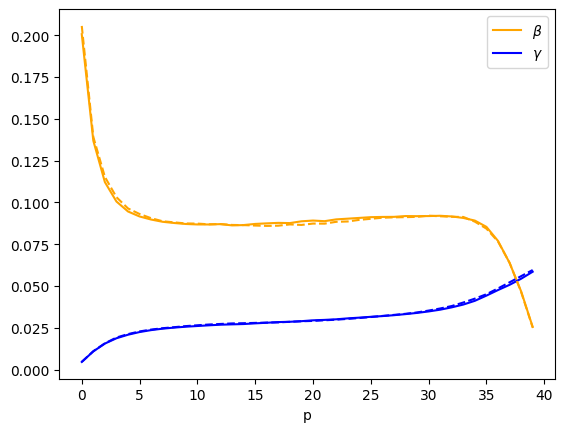

In [9]:
p = 40

row = df_MF[(df_MF['N'] == 25) & (df_MF['p'] == p)].squeeze()
plt.plot(-np.array(row['beta']), label=r'$\beta$', c='orange')
plt.plot(row['gamma'], label=r'$\gamma$', c='b')
row2 = df_MF[(df_MF['N'] == 22) & (df_MF['p'] == p)].squeeze()
plt.plot(-np.array(row2['beta']), c='orange', linestyle='dashed')
plt.plot(np.array(row2['gamma'])*22/25, c='b', linestyle='dashed')
plt.xlabel('p')
plt.legend()
plt.savefig('figures/transfer1.pdf')

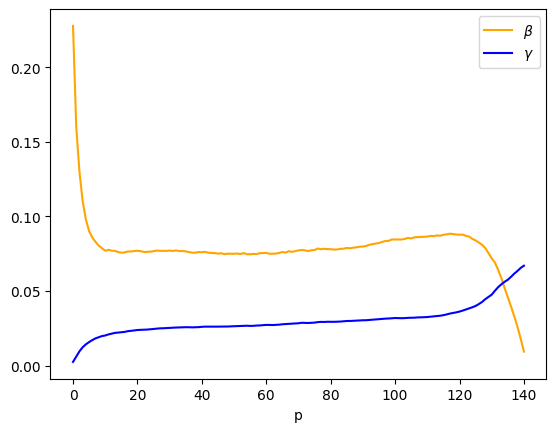

In [10]:
p = 141

row = df_MF[(df_MF['N'] == 22) & (df_MF['p'] == p)].squeeze()
plt.plot(-np.array(row['beta']), label=r'$\beta$', c='orange')
plt.plot(row['gamma'], label=r'$\gamma$', c='b')
plt.xlabel('p')
plt.legend()
plt.savefig('figures/schedule.pdf')

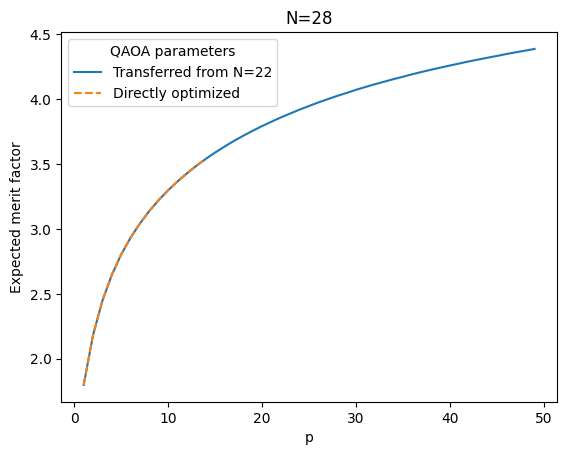

In [11]:
N = 28
max_p = 50
for label_to_plot in ['merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        ("Transferred from N=22", df_tran_mf_22),  
        # ("N=22 overlap", df_tran_overlap_22),  
        # ("N=23 overlap", df_tran_overlap_23),  
        ("Directly optimized", df_MF),
    ]:
        if 'optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
            linestyle='dashed'
        else:
            label_to_plot_processed = label_to_plot
            linestyle='solid'
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label, linestyle=linestyle)
        
        plt.legend(title="QAOA parameters")
    plt.title(f"N={N}")
    ax.set_ylabel('Expected merit factor')

plt.savefig('figures/transfer2.pdf')

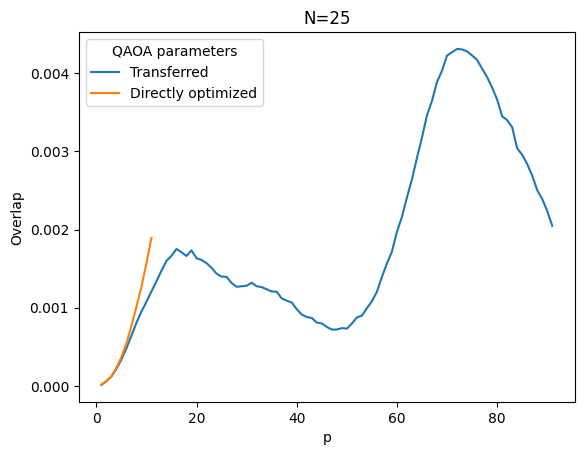

In [12]:
N = 25
max_p = 150
for label_to_plot in ['overlap transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [ 
        ("Transferred", df_tran_batch_overlap_0113),
        ("Directly optimized", df_overlap),
    ]:
        if 'optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="QAOA parameters")
    plt.title(f"N={N}")
    ax.set_ylabel('Overlap')

# plt.savefig('figures/transfer3.pdf')

In [13]:
# careful: this takes a minute; commented out

"""
f, ax = plt.subplots()
dftmp = df_tran_mf_22
to_plot = dftmp[(dftmp['p'] == 138) & (dftmp['N'] >= 23)]
to_plot.sort_values('N').set_index('N')['merit factor transferred'].plot(label='QAOA (expectation)')
Ns = sorted(set(to_plot['N']))
ax.plot(Ns, [true_optimal_mf[N] for N in Ns], c='k', linestyle='dashed', label='Optimal')
ax.plot(range(23, 30), [get_random_guess_merit_factor(N) for N in range(23, 30)], c='k', linestyle='dotted', label='Random guess')
ax.set_ylabel('Merit factor')
plt.title(f"p = {p}")
plt.legend()
plt.savefig('figures/scaling1.pdf')
"""

'\nf, ax = plt.subplots()\ndftmp = df_tran_mf_22\nto_plot = dftmp[(dftmp[\'p\'] == 138) & (dftmp[\'N\'] >= 23)]\nto_plot.sort_values(\'N\').set_index(\'N\')[\'merit factor transferred\'].plot(label=\'QAOA (expectation)\')\nNs = sorted(set(to_plot[\'N\']))\nax.plot(Ns, [true_optimal_mf[N] for N in Ns], c=\'k\', linestyle=\'dashed\', label=\'Optimal\')\nax.plot(range(23, 30), [get_random_guess_merit_factor(N) for N in range(23, 30)], c=\'k\', linestyle=\'dotted\', label=\'Random guess\')\nax.set_ylabel(\'Merit factor\')\nplt.title(f"p = {p}")\nplt.legend()\nplt.savefig(\'figures/scaling1.pdf\')\n'

## Visual confirmation

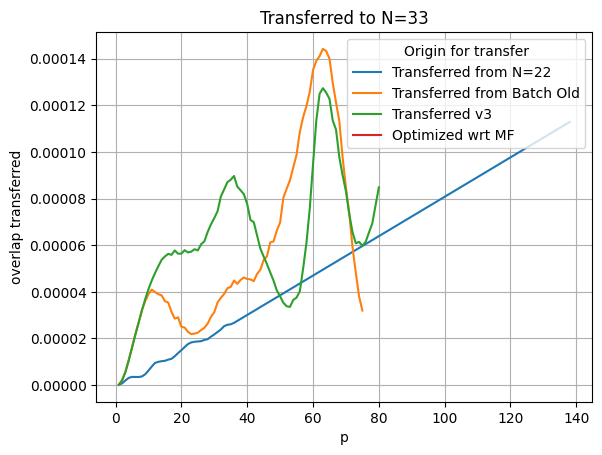

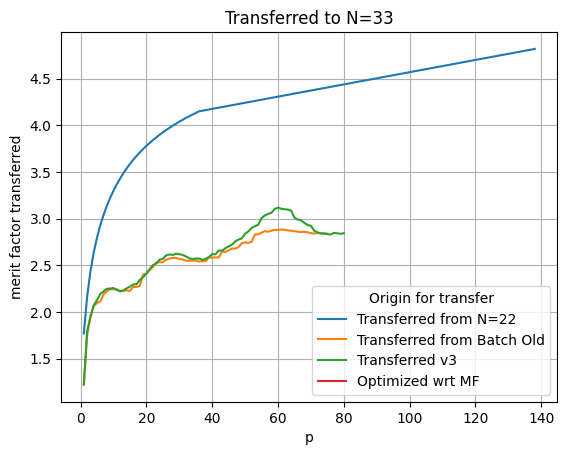

In [10]:
N = 33
max_p = 175
for label_to_plot in ['overlap transferred', 'merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        ("Transferred from N=22", df_tran_mf_22),  
        # ("N=22 overlap", df_tran_overlap_22),  
        # ("N=23 overlap", df_tran_overlap_23),  
        ("Transferred from Batch Old", df_tran_batch_overlap_0113),  
        ("Transferred v3", df_tran_batch_overlap_0124),  
        # ("Transferred from Batch New", df_tran_batch_overlap_0123),  
        # ("Optimized wrt overlap", df_overlap), 
        ("Optimized wrt MF", df_MF),
    ]:
        if 'Optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="Origin for transfer")
    plt.title(f"Transferred to N={N}")
    ax.set_ylabel(label_to_plot)
    plt.grid()
    plt.show()

## Confirm that merit factor is great with transferred parameters (up to `p = 141`)

In [15]:
for N in set(df_tran_mf_22['N']):
    df_slice = df_tran_mf_22[(df_tran_mf_22['N'] == N) & (df_tran_mf_22['p'] <= 141)].set_index('p')['merit factor transferred']
    diffs = np.diff(df_slice)
    if len(diffs) > 0 and np.min(diffs) < 0:
        print(f"For N = {N}, found non-increasing sequence: {diffs}")

For N = 23, found non-increasing sequence: [ 0.38027436  0.26107365  0.19718627  0.15744494  0.12984615  0.1102845
  0.09594349  0.08455006  0.07574782  0.06844499  0.06172045  0.05774151
  0.05256828  0.04871923  0.04490802  0.04210741  0.0393891   0.03686817
  0.03534403  0.03309793  0.03162124  0.02975933  0.0287847   0.02715008
  0.02619642  0.02495738  0.02421914  0.02250478  0.02330724  0.0209529
  0.02030744  0.01895627  0.01842975  0.01711443  0.01811832  0.01647759
  0.01574124  0.01531412  0.01513093  0.01449455  0.0150724   0.01442177
  0.01410953  0.01377288  0.01513408  0.01381727  0.01346147  0.0138558
  0.01355593  0.01286236  0.01254313  0.01245257  0.01171454  0.01197358
  0.01100595  0.0115287   0.01053768  0.01146976  0.010575    0.01081243
  0.01075267  0.01014674  0.01010832  0.00947902  0.00963224  0.00877042
  0.00959489  0.00828609  0.00807329  0.00792358  0.00799213  0.00658669
  0.00870947  0.0063895   0.00718877  0.00682331  0.00732214  0.00737883
  0.0060877

Only one example of merit factor not increasing!

In [16]:
n_p = []
ratios = []
for N in range(23, 35):
    for p in set(df_MF['p']):
        row_optimized = df_MF[(df_MF['N'] == N) & (df_MF['p'] == p)].squeeze()
        row_tran = df_tran_mf_22[(df_tran_mf_22['N'] == N) & (df_tran_mf_22['p'] == p)].squeeze()
        if len(row_optimized) > 0 and len(row_tran) > 0:
            ratios.append(row_tran['merit factor transferred'] / row_optimized['merit factor'])
            n_p.append((N, p))
print(f"Worst ratio between transferred and directly optimized merit factor: {np.min(ratios):.5f} at {n_p[np.argmin(ratios)]}, average: {np.mean(ratios):.5f}")

Worst ratio between transferred and directly optimized merit factor: 0.97759 at (24, 98), average: 0.99768


The transfer works essentially as well as out direct optimization

# Hardware resources

In [17]:
from labs import get_terms

def print_number_of_gates(N):
    terms = get_terms(N)
    total = 0
    for term in terms:
        if len(term) == 4:
            total += 5
        elif len(term) == 2:
            total += 1
        else:
            assert False
    print(f"{total} ZZMax, with 30 gate zones: {np.ceil(total / 30)} operations")

In [104]:
print_number_of_gates(67)

118129 ZZMax, with 30 gate zones: 3938.0 operations


In [108]:
((17406 / 0.0006) / 3600) / 24

335.7638888888889

In [19]:
for N in range(6,12):
    print_number_of_gates(N)
    print(N, df_overlap[(df_overlap["N"] == N) & (df_overlap["p"] == 1)].squeeze()['overlap'])

41 ZZMax, with 30 gate zones: 2.0 operations
6 0.9152671498
74 ZZMax, with 30 gate zones: 3.0 operations
7 0.0825507256
122 ZZMax, with 30 gate zones: 5.0 operations
8 0.1881227962
186 ZZMax, with 30 gate zones: 7.0 operations
9 0.13165911660000001
270 ZZMax, with 30 gate zones: 9.0 operations
10 0.12721872380000002
375 ZZMax, with 30 gate zones: 13.0 operations
11 0.0110055252


# Plot scaling

In [11]:
import statsmodels.api as sm

def plot_scaling(dftmp, p, max_n = 32, min_n = 24):
    df_gurobi = pd.read_csv(
        "../qokit/assets/classical_solvers/gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
    )

    dftmp['TTS'] = 1 / dftmp['overlap transferred']
    dftmp = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]

    plt.plot(dftmp['N'].values, dftmp['TTS'].values, c='b', label='QAOA')

    X = sm.add_constant(dftmp['N'].values)

    mod = sm.OLS(np.log(dftmp['TTS'].values), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(dftmp['N'].values, np.e**pred.predicted_mean, c='b', linestyle='dashed',
             label=f'QAOA fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')


    df_gurobi = df_gurobi[(df_gurobi['n'] >= dftmp['N'].min()) & (df_gurobi['n'] <= dftmp['N'].max())]
    df_gurobi['TTS scaled'] = dftmp['TTS'].values[0] * df_gurobi["TTS_process_time"] / df_gurobi["TTS_process_time"].values[0]

    plt.plot(dftmp['N'].values, df_gurobi['TTS scaled'].values, c='orange', label='Gurobi')

    mod = sm.OLS(np.log(df_gurobi['TTS scaled'].values), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(dftmp['N'].values, np.e**pred.predicted_mean, c='orange', linestyle='dashed',
             label=f'Gurobi fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')

    plt.xlabel('N')
    plt.yscale('log')
    plt.title(f"p={p}")
    plt.legend()

def plot_scaling_coeffs(dftmp, max_p, max_n = 32, min_n = 24):
    
    dftmp['TTS'] = 1 / dftmp['overlap transferred']
    
    f, ax = plt.subplots()

    ps = range(1, max_p)
    ps_to_plot = []
    coefs = []
    ci_mins = []
    ci_maxs = []
    runtimes = []

    for p in ps:
        dftmp_slice = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]
        if len(dftmp_slice) != (max_n-min_n+1):
            continue
        
        X = sm.add_constant(dftmp_slice['N'].values)

        mod = sm.OLS(np.log(dftmp_slice['TTS'].values), X)
        res = mod.fit()
    
        coefs.append(np.e**res.params[1])
        ci_mins.append(np.e**(res.params[1]-res.bse[1]))
        ci_maxs.append(np.e**(res.params[1]+res.bse[1]))
        ps_to_plot.append(p)
        runtimes.append(p*np.e**(res.predict([1, 67])))

    ax.plot(ps_to_plot, coefs, label="Transfer from 22", c='b')
    ax.fill_between(ps_to_plot, ci_mins, ci_maxs, color='b', alpha=0.2)
    plt.xlabel('p')
    plt.ylabel('Coeff b in b**N fit')
    plt.title(f'Best estimated runtime for N=67: {np.min(runtimes) / 360000:.2f} hours')


# Best scaling

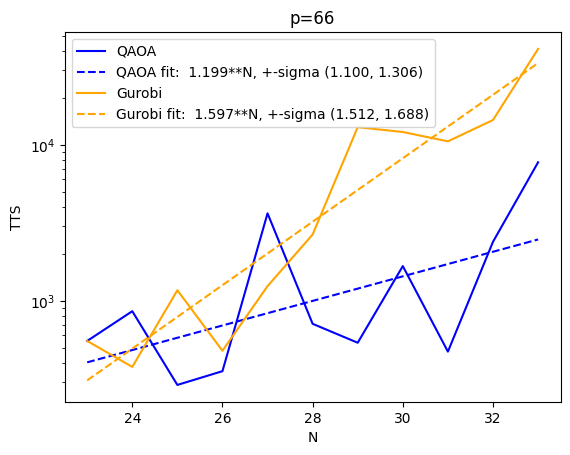

In [154]:
plot_scaling(df_tran_batch_overlap_0113, 66, max_n=33, min_n=23)
plt.ylabel('TTS')
plt.savefig('figures/scaling_overlap_batch_v1.pdf')

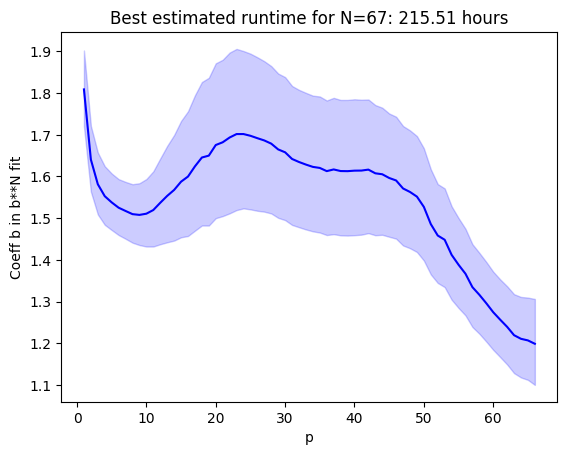

In [148]:
from sklearn.linear_model import LinearRegression

plot_scaling_coeffs(df_tran_batch_overlap_0113, 100, max_n=33, min_n=23)
plt.savefig('figures/scaling_coeffs_overlap_batch_v1_33.pdf')

# Other scalings

## What is the scaling with parameters optimized for merit factor?

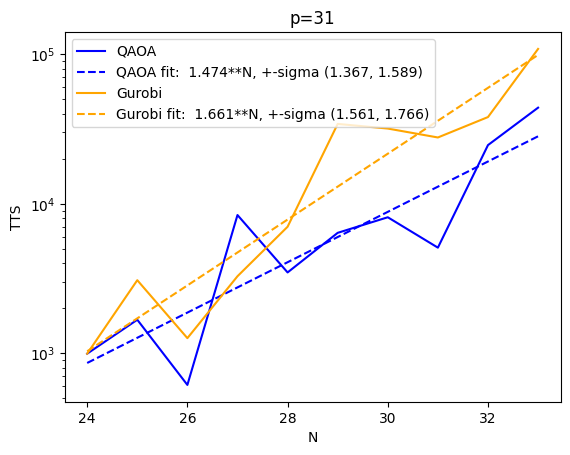

In [23]:
plot_scaling(df_tran_mf_22, 31, max_n=33)
plt.ylabel('TTS')
plt.savefig('figures/scaling_mf.pdf')

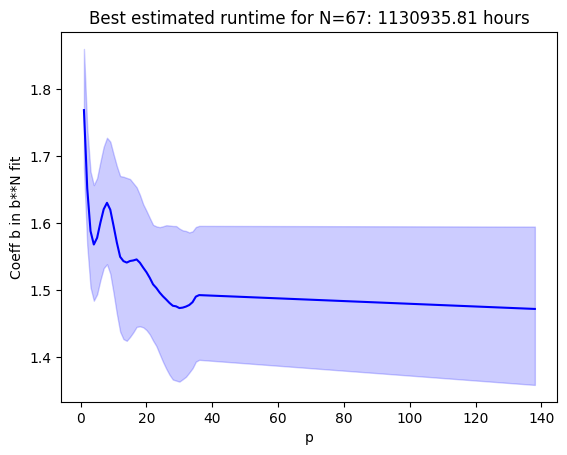

In [14]:
plot_scaling_coeffs(df_tran_mf_22, 141, max_n=33)
plt.savefig('figures/scaling_coeffs_mf.pdf')

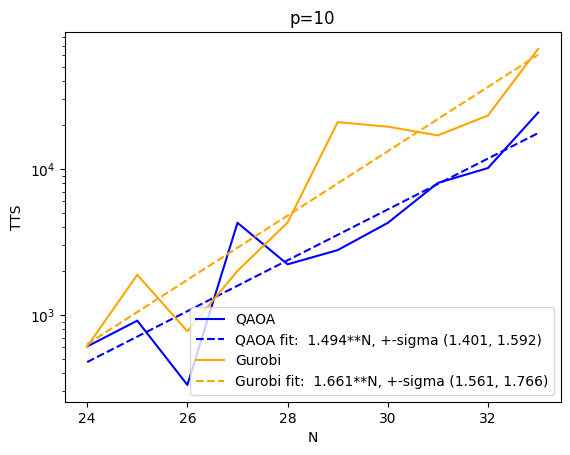

In [102]:
plot_scaling(df_tran_batch_overlap_0124, 10, max_n=33)
plt.ylabel('TTS')
plt.savefig('figures/scaling_overlap_new_batch.pdf')

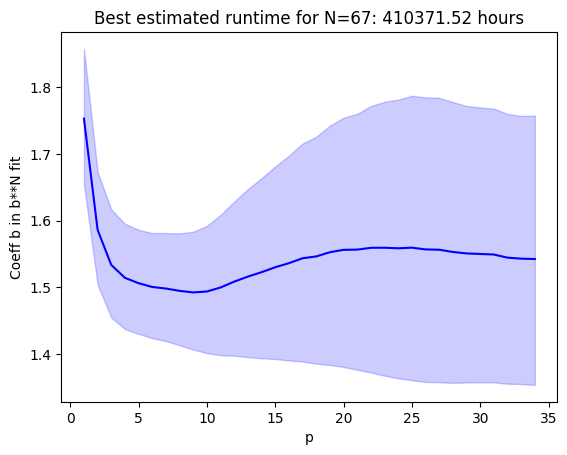

In [103]:
from sklearn.linear_model import LinearRegression

plot_scaling_coeffs(df_tran_batch_overlap_0124, 100, max_n=33)
plt.savefig('figures/scaling_coeffs_overlap_batch_v3_33.pdf')

## Bad stuff happens at the step from `p = 141` to `p = 142`

Rerunning currently

In [27]:
for N in range(22,34):
    MFs = []
    for p in [140, 141, 142, 143]:
        row = df_tran_mf_22[(df_tran_mf_22['N'] == N) & (df_tran_mf_22['p'] == p)]
        if len(row) > 0:
            row = row.squeeze()
            MFs.append(row['merit factor transferred'])
    if len(MFs) >= 3:
        print(f"{N}, {np.diff(MFs)}")

23, [-0.00056804 -0.3586985   0.01688247]
24, [ 0.00737094 -0.19510987  0.01593005]
25, [ 0.00949823 -0.00838841  0.0208265 ]
26, [ 0.00511864 -0.08901387  0.01741989]
27, [ 0.00490269 -0.05800818  0.01297203]
28, [ 0.00359378 -0.05535926  0.01154463]
29, [0.00359195 0.04076834 0.00790603]
30, [ 0.0021961  -0.11649294  0.01242683]
31, [ 0.00188044 -0.15041211  0.01393784]


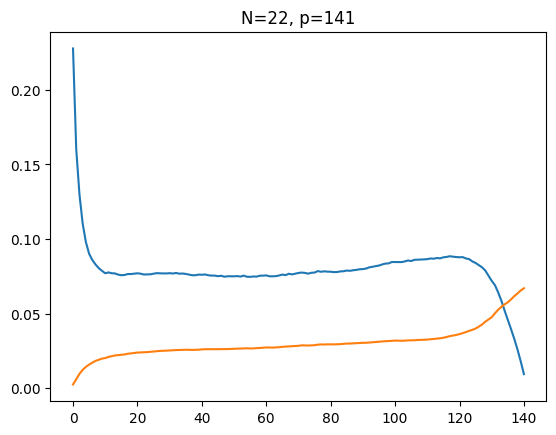

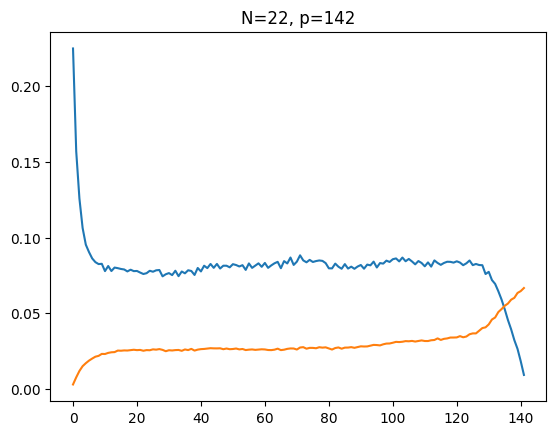

In [28]:
N = 22
for p in [141,142]:
    row = df_MF[(df_MF['N'] == N) & (df_MF['p'] == p)].squeeze()
    plt.plot(-np.array(row['beta']), label='beta')
    plt.plot(row['gamma'], label='gamma')
    plt.title(f"N={N}, p={p}")
    plt.show()